## 20. Directed Graphs

### 20.1 Introduction

Directed graphs are similar to undirected graphs, but there are arrows between vertices instead of edges.  Like undirected graphs, directed graphs can be used to represent independence relations.  They can also be used as an alternative to counterfactuals to represent causal relationships.  Some people use the phrase **Bayesian network** to refer to a directed graph endowed with a probability distribution.  This is a poor choice of terminology.  Statistical inference for directed graphs can be performed using frequentist or Bayesian methods so it is misleading to call them Bayesian networks.

### 20.2 DAG's

A **directed graph** $\mathcal{G}$ consists of a set of vertices $V$ and an edge set $E$ of ordered pairs of variables.  If $(X, Y) \in E$ then there is an arrow pointing from $X$ to $Y$.

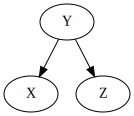

In [1]:
from graphviz import Digraph

d = Digraph()

d.edge('Y', 'X')
d.edge('Y', 'Z')

d

If an arrow connects two variables $X$ and $Y$ (in either direction) we say that $X$ and $Y$ are **adjacent**.  If there is an arrow from $X$ to $Y$ then $X$ is a **parent** of $Y$ and $Y$ is a **child** of $X$.  The set of all parents of $X$ is denoted by $\pi_X$ or $\pi(X)$.  A **directed path** from $X$ to $Y$ is a set of vertices beginning with $X$, ending with $Y$ such that each pair is connected by an arrow and all of the arrows point in the same direction:

$$ X \rightarrow \cdots \rightarrow Y
\quad \text{or} \quad
X \leftarrow \cdots \leftarrow Y $$

A sequence of adjacent vertices starting with $X$ and ending with $Y$ but ignoring the directions of the arrows is called an **undirected path**.  $X$ is an **ancestor** of $Y$ if there is a directed path from $X$ to $Y$.  We also say that $Y$ is a **descendant** of $X$.

A configuration of the form:

$$ X \rightarrow Y \leftarrow Z $$

is called a **collider**.  A configuration not of that form is called a **non-collider**, for example,

$$ X \rightarrow Y \rightarrow Z
\quad \text{or} \quad
X \leftarrow Y \leftarrow Z$$

A directed path that starts and ends at the same variable is called a **cycle**.  A directed graph is **acyclic** if it has no cycles.  In this case we say that the graph is a **directed acyclic graph** or **DAG**.  From now on, we will only deal with graphs that are DAG's.

### 20.3 Probability and DAG's

Let $\mathcal{G}$ be a DAG with vertices $V = (X_1, \dots, X_k)$.

If $\mathbb{P}$ is a distribution for $V$ with probability function $p$, we say that **$\mathbb{P}$ is Markov to $\mathcal{G}$** or that **$\mathcal{G} represents $\mathbb{P}$** if

$$ p(v) = \prod_{i=1}^k p(x_i | \pi_i) $$

where the $\pi_i$ are the parents of $X_i$.  The set of distributions represented by $\mathcal{G}$ is denoted by $M(\mathcal{G})$.

The following theorem says that $\mathbb{P} \in M(\mathcal{G})$ if and only if the following **Markov Condition** holds.  Roughly speaking, the Markov Condition says that every variable $W$ is independent of the "past" given its parents.

**Theorem 20.3**. A distribution $\mathbb{P} \in M(\mathcal{G})$ if and only if the following **Markov Condition** holds: for every variable $W$,

$$W \text{ ⫫ } \overline{W} | \pi_W $$

where $\overline{W}$ denotes all the other variables except parents and descendants of $W$.

### 20.4 More Independence Relations

The Markov Condition allows us to list some independence relations.  These relations may logically imply other independence relations.  Consider this DAG:

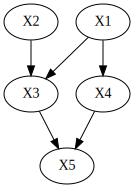

In [2]:
from graphviz import Digraph

d = Digraph()

d.edge('X2', 'X3')
d.edge('X1', 'X3')
d.edge('X1', 'X4')
d.edge('X3', 'X5')
d.edge('X4', 'X5')

d

The Markov Condition implies:

- $X_1 \text{ ⫫ } X_2$
- $X_2 \text{ ⫫ } \{ X_1, X_4 \}$
- $X_3 \text{ ⫫ } X_4 | \{ X_1, X_2 \}$
- $X_4 \text{ ⫫ } \{ X_2, X_3 \} | X_1$
- $X_5 \text{ ⫫ } \{ X_1, X_2 \} | \{X_3, X_4\}$

It turns out that these conditions imply:

$$ \{ X_4, X_5 \} \text{ ⫫ } X_2 | \{ X_1, X_3 \} $$

How do we find these extra independence relations?  The answer is **d-separation**, which can be summarized by 3 rules.

**The rules of d-separation**

1.  In a non-collider $(X, Y, Z)$, $X$ and $Z$ are **d-connected**, but they are **d-separated** given $Y$.
2.  If $X$ and $Z$ collide at $Y$ then $X$ and $Z$ are **d-separated** but they are **d-connected** given $Y$.
3.  Conditioning on the descendant of a collider has the same effect as conditioning on the collider.  Thus in the figure below, $X$ and $Z$ are **d-separated** but they are **d-connected** given $W$.

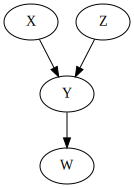

In [4]:
from graphviz import Digraph

d = Digraph()

d.edge('X', 'Y')
d.edge('Z', 'Y')
d.edge('Y', 'W')

d

Here is a more formal definition of d-separation.  Let $X$ and $Y$ be distinct vertices and let $W$ be a set of vertices not containing $X$ or $Y$.  Then $X$ and $Y$ are **d-separated given $W$** if there exists no undirected path $U$ between $X$ and $Y$ such that (i) every collider on $U$ has a descendant in $W$ and (ii) no other vertex on $U$ is in $W$.  If $U$, $V$, $W$ are distinct sets of vertices and $U$ and $V$ are not empty, then $U$ and $V$ are d-separated given $W$ if for every $X \in U$ and $Y \in V$, $X$ and $Y$ are d-separated given $W$.  Vertices that are not d-separated are said to be d-connected.

**Theorem 20.7 (Spirtes, Glymour and Scheines)**.  Let $A$, $B$ and $C$ be disjoint sets of vertices.  Then $A \text{ ⫫ } B | C$ if and only if $A$ and $B$ are d-separated by $C$.

Graphs that look different may imply the same independence relations.  If $\mathcal{G}$ is a DAG, we let $\mathcal{I}(\mathcal{G})$ denote all the independence statements implied by $\mathcal{G}$.  Two DAG's $\mathcal{G}_1$ and $\mathcal{G}_2$ for the same variables $V$ are **Markov equivalent** if $\mathcal{I}(\mathcal{G}_1) = \mathcal{I}(\mathcal{G}_2)$.  Given a DAG $\mathcal{G}$, let $\text{skeleton}(\mathcal{G})$ denote the undirected graph obtained by replacing the arrows with undirected edges.

**Theorem 20.9**.  Two DAG's $\mathcal{G}_1$ and $\mathcal{G}_2$ are Markov equivalent if and only if (i) $\text{skeleton}(\mathcal{G}_1) = \text{skeleton}(\mathcal{G}_2)$ and (ii) $\mathcal{G}_1$ and $\mathcal{G}_2$ have the same colliders.